In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv("/home/jp/Downloads/hotel_booking.csv",encoding="utf-8")

In [3]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [6]:
diccionario = pd.read_csv("diccionario_datos P2 hotel booking - features.csv",encoding="utf-8")

FileNotFoundError: [Errno 2] No such file or directory: 'diccionario_datos P2 hotel booking - features.csv'

In [7]:
diccionario

,description,feature,Descripción
0,The datasets contains the booking information ...,hotel,Los conjuntos de datos contienen la informació...
1,Value indicating if the booking was canceled (...,is_canceled,Valor que indica si la reserva fue cancelada (...
2,Number of days that elapsed between the enteri...,lead_time,Número de días transcurridos entre la fecha de...
3,Year of arrival date,arrival_date_year,Año de la fecha de llegada
4,Month of arrival date with 12 categories: “Jan...,arrival_date_month,Mes de la fecha de llegada con 12 categorías: ...
5,Week number of the arrival date,arrival_date_week_number,Número de semana de la fecha de llegada
6,Day of the month of the arrival date,arrival_date_day_of_month,Día del mes de la fecha de llegada
7,Number of weekend nights (Saturday or Sunday) ...,stays_in_weekend_nights,Número de noches de fin de semana (sábado o do...
8,Number of week nights (Monday to Friday) the g...,stays_in_week_nights,Número de noches de la semana (de lunes a vier...
9,Number of adults,adults,Número de Adultos


In [8]:
diccionario_ = {}
feature = list(diccionario["feature"])
description = list(diccionario["Descripción"])
diccionario_ = dict(zip(feature,description))
diccionario_

{'hotel': 'Los conjuntos de datos contienen la información de reserva de dos hoteles. Uno de los hoteles es un hotel resort y el otro es un hotel urbano.',
 'is_canceled': 'Valor que indica si la reserva fue cancelada (1) o no (0).',
 'lead_time': 'Número de días transcurridos entre la fecha de entrada de la reserva en el PMS y la fecha de llegada.',
 'arrival_date_year': 'Año de la fecha de llegada',
 'arrival_date_month': 'Mes de la fecha de llegada con 12 categorías: "enero" a "diciembre"',
 'arrival_date_week_number': 'Número de semana de la fecha de llegada',
 'arrival_date_day_of_month': 'Día del mes de la fecha de llegada',
 'stays_in_weekend_nights': 'Número de noches de fin de semana (sábado o domingo) que el huésped se hospedó o reservó para alojarse en el hotel',
 'stays_in_week_nights': 'Número de noches de la semana (de lunes a viernes) que el huésped se hospedó o reservó para alojarse en el hotel BO y BL / Calculado contando el número de noches de la semana',
 'adults': '

In [9]:
objetivo = ["is_cancelled"]

In [7]:
data.shape

(119390, 36)

In [8]:
data.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
data["agent"].value_counts(1,dropna=False)

9.0      0.267702
NaN      0.136862
240.0    0.116609
1.0      0.060231
14.0     0.030488
           ...   
280.0    0.000008
285.0    0.000008
289.0    0.000008
265.0    0.000008
497.0    0.000008
Name: agent, Length: 334, dtype: float64

In [11]:
data["agent"].value_counts(0,dropna=False)

9.0      31961
NaN      16340
240.0    13922
1.0       7191
14.0      3640
         ...  
280.0        1
285.0        1
289.0        1
265.0        1
497.0        1
Name: agent, Length: 334, dtype: int64

In [12]:
data["agent"].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

## Limpieza de base

In [4]:
df = data.copy()

In [5]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['fecha_reservacion'] = df['reservation_status_date'].dt.strftime('%m').astype(int)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,fecha_reservacion
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647,9
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333,9
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821,9
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860,9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [9]:
var_d = ['reservation_status','customer_type','deposit_type','assigned_room_type','reserved_room_type','market_segment',
        'country','hotel']
var_c = ['fecha_reservacion','total_of_special_requests','required_car_parking_spaces','days_in_waiting_list','agent',
         'booking_changes','lead_time','babies','children',
        'adults','stays_in_week_nights','stays_in_weekend_nights']
target = ['is_canceled']

Ya que compañia tiene muchos campos nulos, se decidio que no se tomara en cuenta para el modelo

### Variables continuas

#### Imputacion de valores ausentes

In [10]:
from sklearn.impute import SimpleImputer
from scipy.stats import ks_2samp

In [11]:
im = SimpleImputer(strategy='median')
im.fit(df[var_c])
df[var_c]=im.transform(df[var_c])

In [12]:
### Validar que la distribución no fue alterada
ks = pd.DataFrame(map(lambda v:(v,ks_2samp(df[v].dropna(), df[v]).statistic), var_c), 
                  columns=['var', 'ks'])

In [13]:
ks.loc[ks['ks']>=0.1]

,var,ks


segun la prueba de K-S ninguna variable se altero su distribucion, por lo que no es necesario eliminiar alguna

#### Valores Extremos

In [14]:
df[var_c].describe(percentiles = [0.1,0.25,0.5,0.75,0.99])

,fecha_reservacion,total_of_special_requests,required_car_parking_spaces,days_in_waiting_list,agent,booking_changes,lead_time,babies,children,adults,stays_in_week_nights,stays_in_weekend_nights
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,6.334123,0.571363,0.062518,2.321149,76.744392,0.221124,104.011416,0.007949,0.103886,1.856403,2.500302,0.927599
std,3.346352,0.792798,0.245291,17.594721,105.904658,0.652306,106.863097,0.097436,0.398555,0.579261,1.908286,0.998613
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,2.000000,0.000000,0.000000,0.000000,6.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,9.000000,0.000000,18.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,6.000000,0.000000,0.000000,0.000000,14.000000,0.000000,69.000000,0.000000,0.000000,2.000000,2.000000,1.000000
75%,9.000000,1.000000,0.000000,0.000000,152.000000,0.000000,160.000000,0.000000,0.000000,2.000000,3.000000,2.000000
99%,12.000000,3.000000,1.000000,75.000000,378.000000,3.000000,444.000000,0.000000,2.000000,3.000000,10.000000,4.000000
max,12.000000,5.000000,8.000000,391.000000,535.000000,21.000000,737.000000,10.000000,10.000000,55.000000,50.000000,19.000000


##### Cerca Percentil

In [15]:
ext = df[var_c].describe(percentiles=[0.01, 0.99]).T[['1%', '99%']].reset_index()

for v,li,ls in ext.values:
  df[f'ol_{v}'] = ((df[v]<li)|(df[v]>ls)).astype(int)

df['ext'] = df.filter(like='ol_').max(axis=1)
df.drop(df.filter(like= 'ol_').columns, axis=1, inplace=True)
df['ext'].value_counts(True)

0    0.947676
1    0.052324
Name: ext, dtype: float64

##### Cerca intercuartil

In [16]:
k = 3
ext = df[var_c].describe().T[['25%', '75%', 'mean']].reset_index()
ext['IQR'] = ext['75%']-ext['25%']
ext['li'] = ext['mean']-k*ext['IQR']
ext['ls'] = ext['mean']+k*ext['IQR']
ext = ext[['index', 'li', 'ls']]


for v,li,ls in ext.values:
  df[f'ol_{v}'] = ((df[v]<li)|(df[v]>ls)).astype(int)
  df['ext_iqr'] = df.filter(like='ol_').max(axis=1)
  df.drop(df.filter(like= 'ol_').columns, axis=1, inplace=True)
df['ext_iqr'].value_counts(True)

0    0.999062
1    0.000938
Name: ext_iqr, dtype: float64

In [17]:
df = df.loc[df['ext_iqr']==0].reset_index(drop=True).drop(['ext', 'ext_iqr'], axis=1)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,fecha_reservacion
0,Resort Hotel,0,342.0,2015,July,27,1,0.0,0.0,2.0,0.0,0.0,BB,PRT,Direct,Direct,0,0,0,C,C,3.0,No Deposit,14.0,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,7.0
1,Resort Hotel,0,737.0,2015,July,27,1,0.0,0.0,2.0,0.0,0.0,BB,PRT,Direct,Direct,0,0,0,C,C,4.0,No Deposit,14.0,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,7.0
2,Resort Hotel,0,7.0,2015,July,27,1,0.0,1.0,1.0,0.0,0.0,BB,GBR,Direct,Direct,0,0,0,A,C,0.0,No Deposit,14.0,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,7.0
3,Resort Hotel,0,13.0,2015,July,27,1,0.0,1.0,1.0,0.0,0.0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0.0,No Deposit,304.0,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,7.0
4,Resort Hotel,0,14.0,2015,July,27,1,0.0,2.0,2.0,0.0,0.0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0.0,No Deposit,240.0,NaN,0.0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119273,City Hotel,0,23.0,2017,August,35,30,2.0,5.0,2.0,0.0,0.0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0.0,No Deposit,394.0,NaN,0.0,Transient,96.14,0.0,0.0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647,9.0
119274,City Hotel,0,102.0,2017,August,35,31,2.0,5.0,3.0,0.0,0.0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0.0,No Deposit,9.0,NaN,0.0,Transient,225.43,0.0,2.0,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333,9.0
119275,City Hotel,0,34.0,2017,August,35,31,2.0,5.0,2.0,0.0,0.0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0.0,No Deposit,9.0,NaN,0.0,Transient,157.71,0.0,4.0,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821,9.0
119276,City Hotel,0,109.0,2017,August,35,31,2.0,5.0,2.0,0.0,0.0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0.0,No Deposit,89.0,NaN,0.0,Transient,104.40,0.0,0.0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860,9.0


array([[<AxesSubplot:title={'center':'fecha_reservacion'}>,
        <AxesSubplot:title={'center':'total_of_special_requests'}>,
        <AxesSubplot:title={'center':'required_car_parking_spaces'}>],
       [<AxesSubplot:title={'center':'days_in_waiting_list'}>,
        <AxesSubplot:title={'center':'agent'}>,
        <AxesSubplot:title={'center':'booking_changes'}>],
       [<AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'babies'}>,
        <AxesSubplot:title={'center':'children'}>],
       [<AxesSubplot:title={'center':'adults'}>,
        <AxesSubplot:title={'center':'stays_in_week_nights'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>]],
      dtype=object)

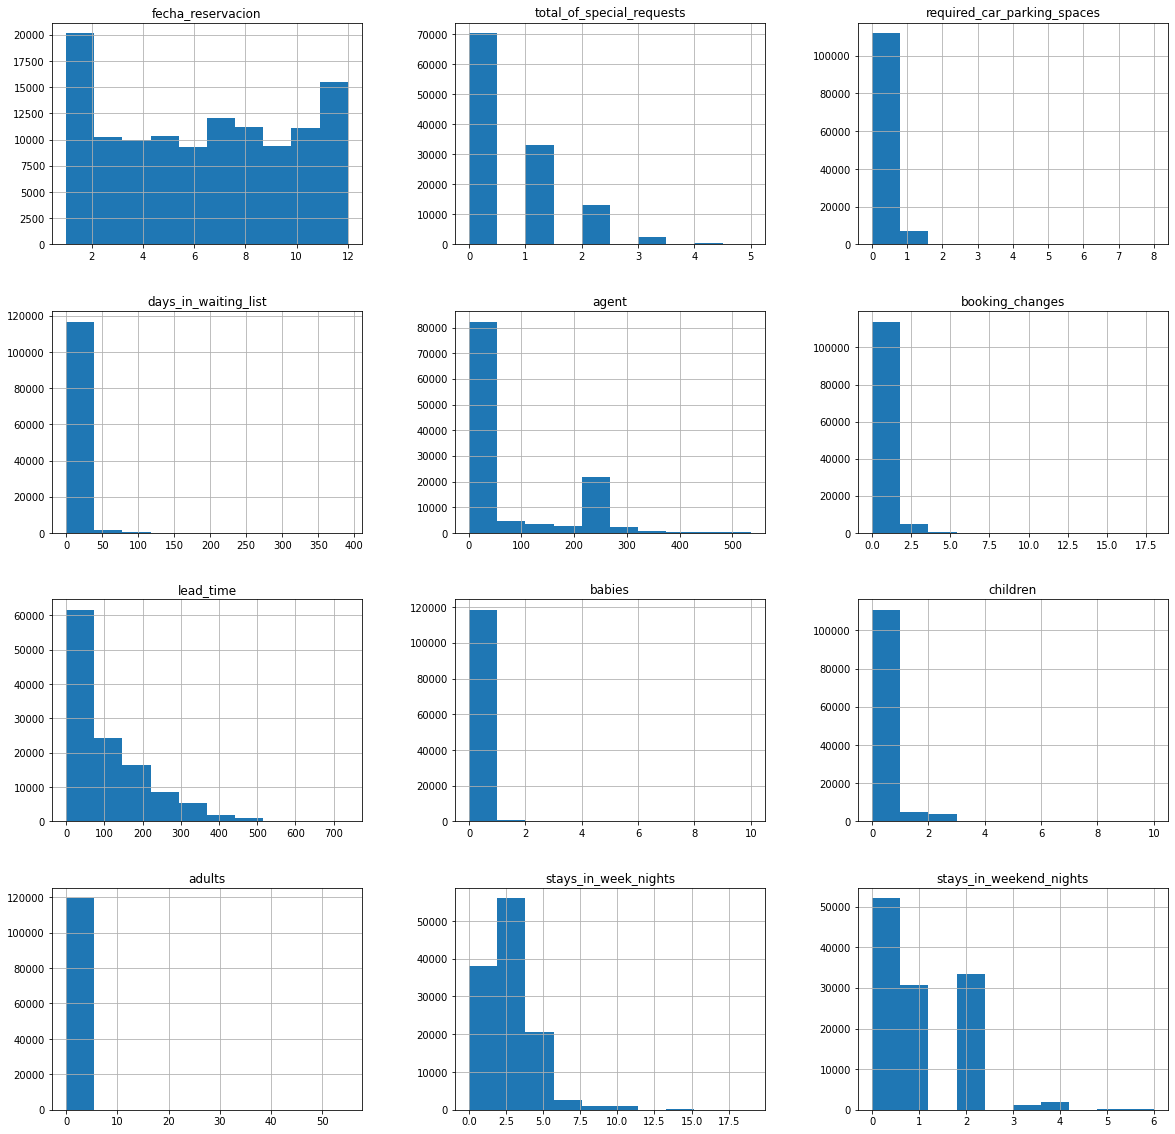

In [18]:
df[var_c].hist(figsize = (20,20))

#### Correlacion

In [19]:
varc = ['is_canceled','fecha_reservacion','total_of_special_requests','required_car_parking_spaces','days_in_waiting_list','agent',
         'booking_changes','lead_time','babies','children',
        'adults','stays_in_week_nights','stays_in_weekend_nights','previous_cancellations'
       ,'previous_bookings_not_canceled']

In [20]:
corr_mat=df[varc].corr()
corr_mat

,is_canceled,fecha_reservacion,total_of_special_requests,required_car_parking_spaces,days_in_waiting_list,agent,booking_changes,lead_time,babies,children,adults,stays_in_week_nights,stays_in_weekend_nights,previous_cancellations,previous_bookings_not_canceled
is_canceled,1.000000,-0.068879,-0.234684,-0.195504,0.054256,-0.051699,-0.145932,0.293514,-0.032484,0.004901,0.060162,0.023852,-0.003590,0.110176,-0.057329
fecha_reservacion,-0.068879,1.000000,0.056538,0.014218,0.017477,-0.001961,0.011612,0.055967,0.006455,-0.006684,-0.003454,0.005245,0.004184,-0.008443,-0.010245
total_of_special_requests,-0.234684,0.056538,1.000000,0.082518,-0.082780,0.056617,0.054218,-0.095915,0.097928,0.081770,0.123072,0.071937,0.075027,-0.048388,0.037726
required_car_parking_spaces,-0.195504,0.014218,0.082518,1.000000,-0.030626,0.125041,0.067342,-0.116480,0.037391,0.056314,0.014892,-0.024907,-0.018223,-0.018501,0.047586
days_in_waiting_list,0.054256,0.017477,-0.082780,-0.030626,1.000000,-0.043233,-0.011610,0.170157,-0.010631,-0.033294,-0.008346,-0.000799,-0.054971,0.005922,-0.009403
agent,-0.051699,-0.001961,0.056617,0.125041,-0.043233,1.000000,0.040994,-0.021106,0.030967,0.049225,0.016787,0.201420,0.161428,-0.017048,-0.038296
booking_changes,-0.145932,0.011612,0.054218,0.067342,-0.011610,0.040994,1.000000,0.001070,0.085322,0.050458,-0.049126,0.076662,0.045568,-0.027361,0.011835
lead_time,0.293514,0.055967,-0.095915,-0.116480,0.170157,-0.021106,0.001070,1.000000,-0.020925,-0.037648,0.119355,0.175439,0.088537,0.086087,-0.073559
babies,-0.032484,0.006455,0.097928,0.037391,-0.010631,0.030967,0.085322,-0.020925,1.000000,0.024033,0.018122,0.022195,0.019741,-0.007506,-0.006554
children,0.004901,-0.006684,0.081770,0.056314,-0.033294,0.049225,0.050458,-0.037648,0.024033,1.000000,0.030352,0.047749,0.048148,-0.024736,-0.021075


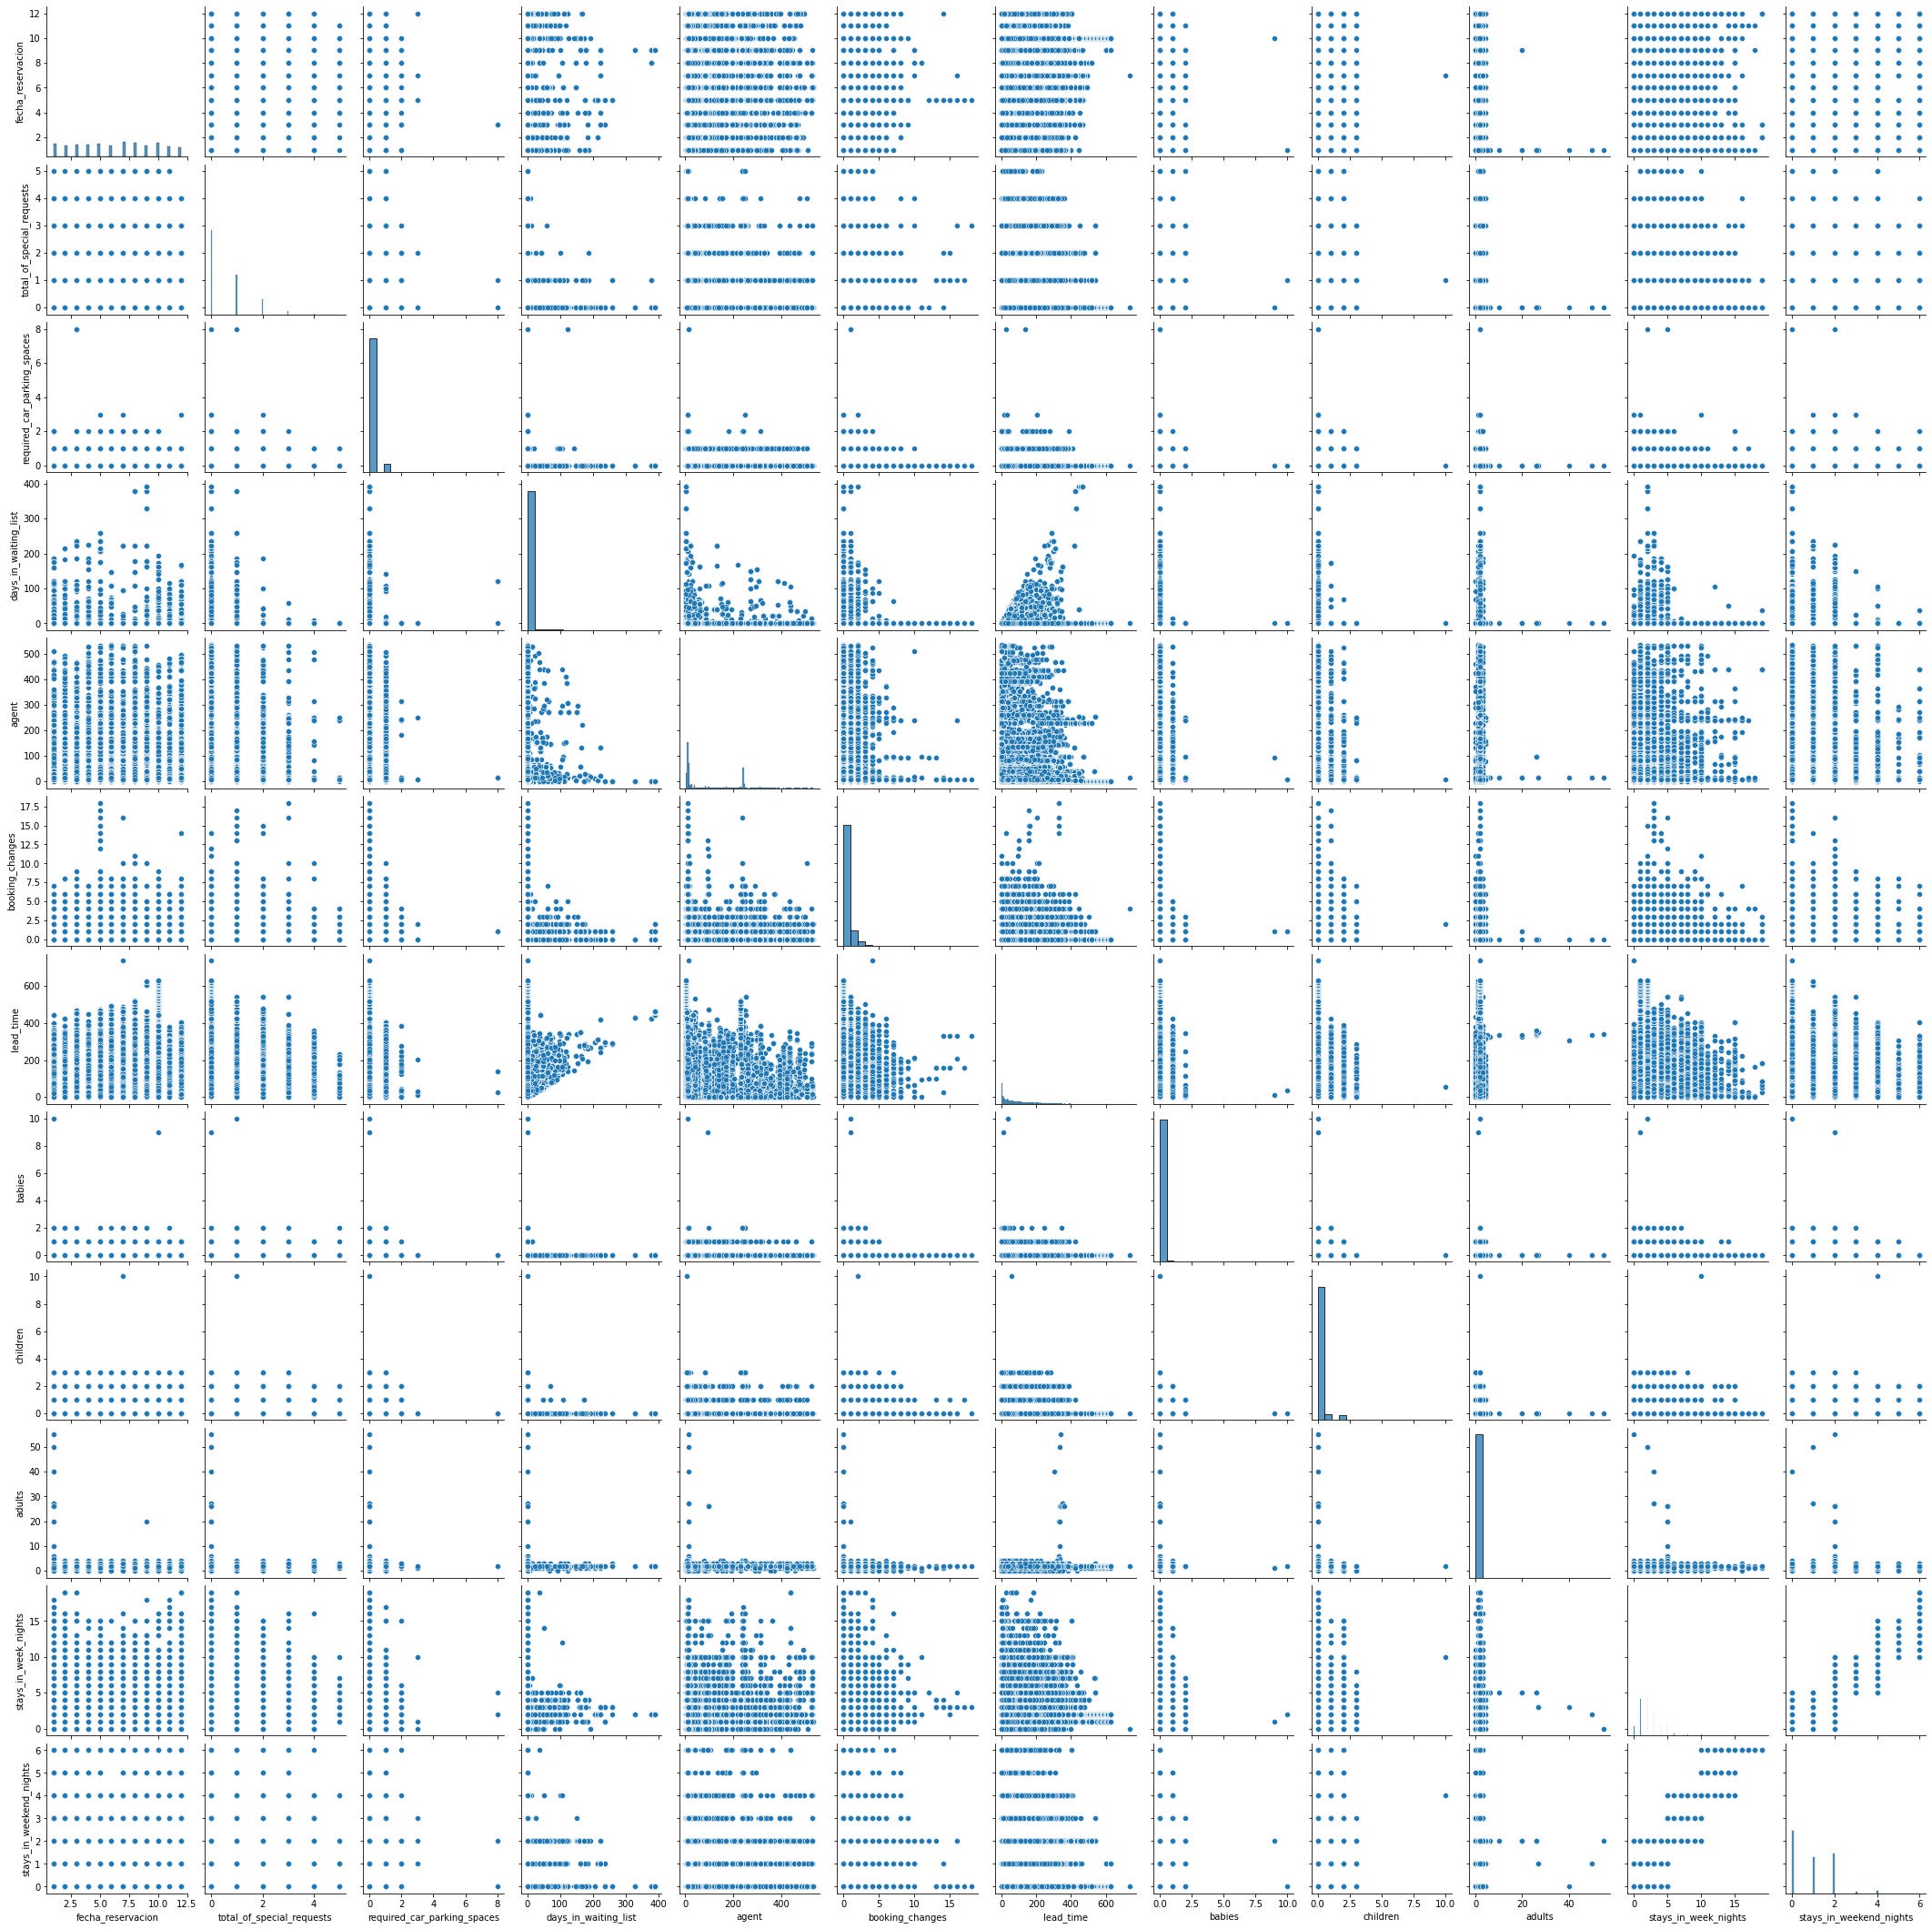

In [21]:
import seaborn as sns
sns.pairplot(df[var_c])

In [22]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import plot,iplot
import cufflinks as cf
pd.options.plotting.backend = "plotly"
cf.go_offline()

In [75]:
df[varc].corr(method="spearman").iplot(kind="heatmap",colorscale="orrd",title="Matriz de Correlación")

In [24]:
var_c = ['fecha_reservacion','total_of_special_requests','required_car_parking_spaces','days_in_waiting_list','agent',
         'booking_changes','babies','children',
        'adults','stays_in_week_nights','stays_in_weekend_nights']

### Variables Discretas

In [25]:
df[var_d].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119278 entries, 0 to 119277
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   reservation_status  119278 non-null  object
 1   customer_type       119278 non-null  object
 2   deposit_type        119278 non-null  object
 3   assigned_room_type  119278 non-null  object
 4   reserved_room_type  119278 non-null  object
 5   market_segment      119278 non-null  object
 6   country             118792 non-null  object
 7   hotel               119278 non-null  object
dtypes: object(8)
memory usage: 7.3+ MB


In [26]:
df['country'].value_counts()

PRT    48553
GBR    12107
FRA    10410
ESP     8567
DEU     7281
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [27]:
df['country']=df['country'].fillna('Otros')

In [28]:
for c in df[var_d].columns:
  aux = df[c].value_counts(True)
  print(aux,"\n"*2)

Check-Out    0.629731
Canceled     0.360192
No-Show      0.010077
Name: reservation_status, dtype: float64 


Transient          0.750516
Transient-Party    0.210550
Contract           0.034097
Group              0.004837
Name: customer_type, dtype: float64 


No Deposit    0.876390
Non Refund    0.122252
Refundable    0.001358
Name: deposit_type, dtype: float64 


A    0.620483
D    0.212068
E    0.065284
F    0.031422
G    0.021353
C    0.019895
B    0.018126
H    0.005969
I    0.003010
K    0.002280
P    0.000101
L    0.000008
Name: assigned_room_type, dtype: float64 


A    0.720477
D    0.160767
E    0.054578
F    0.024271
G    0.017530
B    0.009373
C    0.007814
H    0.005039
P    0.000101
L    0.000050
Name: reserved_room_type, dtype: float64 


Online TA        0.473013
Offline TA/TO    0.202845
Groups           0.166041
Direct           0.105543
Corporate        0.044333
Complementary    0.006221
Aviation         0.001987
Undefined        0.000017
Name: market_segment, dtype:

In [29]:
## Función para crear categorías
def categorias(df,v,umbral=0.05):
  aux = df[v].value_counts(True).to_frame()
  aux[f'1_{v}'] = np.where(aux[v]<umbral, 'OTROS', aux.index)
  aux.drop(v,axis=1, inplace=True)
  aux.reset_index(inplace=True)
  return df.merge(aux, left_on=v, right_on='index', how='inner').drop('index', axis=1)

In [30]:
for v in var_d:
  df = categorias(df, v)

In [31]:
vard1 = df.filter(like='1_').columns.tolist()
vard1

['1_reservation_status',
 '1_customer_type',
 '1_deposit_type',
 '1_assigned_room_type',
 '1_reserved_room_type',
 '1_market_segment',
 '1_country',
 '1_hotel']

In [32]:
for c in df[vard1].columns:
  aux = df[c].value_counts(True)
  print(aux,"\n"*2)

Check-Out    0.629731
Canceled     0.360192
OTROS        0.010077
Name: 1_reservation_status, dtype: float64 


Transient          0.750516
Transient-Party    0.210550
OTROS              0.038934
Name: 1_customer_type, dtype: float64 


No Deposit    0.876390
Non Refund    0.122252
OTROS         0.001358
Name: 1_deposit_type, dtype: float64 


A        0.620483
D        0.212068
OTROS    0.102165
E        0.065284
Name: 1_assigned_room_type, dtype: float64 


A        0.720477
D        0.160767
OTROS    0.064178
E        0.054578
Name: 1_reserved_room_type, dtype: float64 


Online TA        0.473013
Offline TA/TO    0.202845
Groups           0.166041
Direct           0.105543
OTROS            0.052558
Name: 1_market_segment, dtype: float64 


PRT      0.407057
OTROS    0.271299
GBR      0.101502
FRA      0.087275
ESP      0.071824
DEU      0.061042
Name: 1_country, dtype: float64 


City Hotel      0.664733
Resort Hotel    0.335267
Name: 1_hotel, dtype: float64 




## Modelo

In [33]:
X = df[var_c].join(pd.get_dummies(df[vard1]))
y = df[target]

In [34]:
X

,fecha_reservacion,total_of_special_requests,required_car_parking_spaces,days_in_waiting_list,agent,booking_changes,babies,children,adults,stays_in_week_nights,stays_in_weekend_nights,1_reservation_status_Canceled,1_reservation_status_Check-Out,1_reservation_status_OTROS,1_customer_type_OTROS,1_customer_type_Transient,1_customer_type_Transient-Party,1_deposit_type_No Deposit,1_deposit_type_Non Refund,1_deposit_type_OTROS,1_assigned_room_type_A,1_assigned_room_type_D,1_assigned_room_type_E,1_assigned_room_type_OTROS,1_reserved_room_type_A,1_reserved_room_type_D,1_reserved_room_type_E,1_reserved_room_type_OTROS,1_market_segment_Direct,1_market_segment_Groups,1_market_segment_OTROS,1_market_segment_Offline TA/TO,1_market_segment_Online TA,1_country_DEU,1_country_ESP,1_country_FRA,1_country_GBR,1_country_OTROS,1_country_PRT,1_hotel_City Hotel,1_hotel_Resort Hotel
0,7.0,0.0,0.0,0.0,14.0,3.0,0.0,0.0,2.0,0.0,0.0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1
1,7.0,0.0,0.0,0.0,14.0,4.0,0.0,0.0,2.0,0.0,0.0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1
2,7.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,2.0,2.0,0.0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1
3,7.0,1.0,0.0,0.0,303.0,0.0,0.0,0.0,2.0,2.0,0.0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1
4,7.0,1.0,1.0,0.0,250.0,1.0,0.0,2.0,2.0,5.0,2.0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119273,9.0,0.0,0.0,0.0,240.0,1.0,0.0,0.0,2.0,2.0,1.0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
119274,10.0,0.0,0.0,0.0,234.0,1.0,0.0,0.0,1.0,2.0,1.0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
119275,10.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,2.0,3.0,2.0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
119276,7.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0,2.0,0.0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [35]:
y

,is_canceled
0,0
1,0
2,0
3,0
4,0
...,...
119273,0
119274,0
119275,0
119276,0


In [36]:
X = X.drop(columns=['1_country_DEU','1_hotel_Resort Hotel','1_market_segment_OTROS','1_reserved_room_type_E',
                 '1_assigned_room_type_E','1_deposit_type_OTROS','1_customer_type_OTROS','1_reservation_status_OTROS'])
X

,fecha_reservacion,total_of_special_requests,required_car_parking_spaces,days_in_waiting_list,agent,booking_changes,babies,children,adults,stays_in_week_nights,stays_in_weekend_nights,1_reservation_status_Canceled,1_reservation_status_Check-Out,1_customer_type_Transient,1_customer_type_Transient-Party,1_deposit_type_No Deposit,1_deposit_type_Non Refund,1_assigned_room_type_A,1_assigned_room_type_D,1_assigned_room_type_OTROS,1_reserved_room_type_A,1_reserved_room_type_D,1_reserved_room_type_OTROS,1_market_segment_Direct,1_market_segment_Groups,1_market_segment_Offline TA/TO,1_market_segment_Online TA,1_country_ESP,1_country_FRA,1_country_GBR,1_country_OTROS,1_country_PRT,1_hotel_City Hotel
0,7.0,0.0,0.0,0.0,14.0,3.0,0.0,0.0,2.0,0.0,0.0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0
1,7.0,0.0,0.0,0.0,14.0,4.0,0.0,0.0,2.0,0.0,0.0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0
2,7.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,2.0,2.0,0.0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0
3,7.0,1.0,0.0,0.0,303.0,0.0,0.0,0.0,2.0,2.0,0.0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0
4,7.0,1.0,1.0,0.0,250.0,1.0,0.0,2.0,2.0,5.0,2.0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119273,9.0,0.0,0.0,0.0,240.0,1.0,0.0,0.0,2.0,2.0,1.0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
119274,10.0,0.0,0.0,0.0,234.0,1.0,0.0,0.0,1.0,2.0,1.0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
119275,10.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,2.0,3.0,2.0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
119276,7.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0,2.0,0.0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1


In [37]:
X_t, X_v, y_t, y_v = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif

In [39]:
kb = SelectKBest(k = 10, score_func=f_classif)

In [40]:
kb.fit(X_t, y_t)

/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

divide by zero encountered in true_divide



SelectKBest()

In [41]:
ls_best = [x for x, y in zip(X.columns, kb.get_support()) if y]

In [42]:
ls_best

['total_of_special_requests',
 'required_car_parking_spaces',
 '1_reservation_status_Canceled',
 '1_reservation_status_Check-Out',
 '1_deposit_type_No Deposit',
 '1_deposit_type_Non Refund',
 '1_assigned_room_type_A',
 '1_market_segment_Direct',
 '1_market_segment_Groups',
 '1_country_PRT']

In [43]:
scaler = StandardScaler()

In [44]:
Xt = scaler.fit_transform(X_t)
Xv = scaler.transform(X_v)

In [45]:
scaler_m = MinMaxScaler()

In [46]:
Xt_m = scaler_m.fit_transform(X_t)
Xv_m = scaler_m.transform(X_v)

### Hyperparametro

In [47]:
X_t=X_t[ls_best]
X_t=X_t[ls_best]

In [48]:
param_grid = {"loss": ["hinge", "log", "modified_huber", "squared_hinge", "perceptron"],
              "penalty": ["l2", "l1", "elasticnet"],
              "alpha": [x/100+0.01 for x in range(100)],
              "l1_ratio": [x/10 for x in range(10)],
              "learning_rate": ["constant", "optimal", "invscaling", "adaptive"],
              "eta0": [0.001,.01,.5,.00001]
             }

In [49]:
n_hyper = np.prod(list(map(len, param_grid.values())))
n_hyper

240000

In [50]:
%%time
model = SGDClassifier()
hyper1 = RandomizedSearchCV(estimator=model, n_jobs=-1, scoring="roc_auc", param_distributions=param_grid, error_score=-1000, verbose=1, n_iter=int(n_hyper*.0001), random_state=777, cv = 4)
hyper1.fit(X_t, y_t)
hyper1.best_score_

Fitting 4 folds for each of 24 candidates, totalling 96 fits


/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.p

/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.p

/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.p

CPU times: user 884 ms, sys: 319 ms, total: 1.2 s
Wall time: 4.43 s


1.0

In [51]:
%%time
model = SGDClassifier()
hyper2 = RandomizedSearchCV(estimator=model, n_jobs=-1, scoring="roc_auc", param_distributions=param_grid, error_score=-1000, verbose=1, n_iter=int(n_hyper*.0001), random_state=777, cv = 4)
hyper2.fit(Xt, y_t)
hyper2.best_score_

Fitting 4 folds for each of 24 candidates, totalling 96 fits


/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.p

/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.p

/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.p

/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.p

CPU times: user 952 ms, sys: 132 ms, total: 1.08 s
Wall time: 17.4 s


1.0

In [52]:
%%time
model = SGDClassifier()
hyper3 = RandomizedSearchCV(estimator=model, n_jobs=-1, scoring="roc_auc", param_distributions=param_grid, error_score=-1000, verbose=1, n_iter=int(n_hyper*.0001), random_state=777, cv = 4)
hyper3.fit(Xt_m, y_t)
hyper3.best_score_

Fitting 4 folds for each of 24 candidates, totalling 96 fits


/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.p

/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.p

/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.p

/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/utils/validation.p

CPU times: user 900 ms, sys: 110 ms, total: 1.01 s
Wall time: 6.15 s


1.0

In [53]:
from sklearn.metrics import classification_report

In [54]:
hyper1.best_estimator_.coef_

array([[-0.03572986, -0.0520831 ,  0.69299211, -0.769032  , -0.08429773,
         0.08582524,  0.03009072, -0.03708698,  0.00793436,  0.07706001]])

In [55]:
model_best1=hyper1.best_estimator_

In [56]:
print(classification_report(y_t, model_best1.predict(X_t)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     52531
           1       1.00      0.99      0.99     30963

    accuracy                           0.99     83494
   macro avg       1.00      0.99      0.99     83494
weighted avg       0.99      0.99      0.99     83494



In [57]:
model_best2=hyper2.best_estimator_
print(classification_report(y_t, model_best2.predict(Xt)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52531
           1       1.00      1.00      1.00     30963

    accuracy                           1.00     83494
   macro avg       1.00      1.00      1.00     83494
weighted avg       1.00      1.00      1.00     83494



In [58]:
model_best3=hyper3.best_estimator_
print(classification_report(y_t, model_best3.predict(Xt_m)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     52531
           1       1.00      0.98      0.99     30963

    accuracy                           0.99     83494
   macro avg       0.99      0.99      0.99     83494
weighted avg       0.99      0.99      0.99     83494



In [59]:
print(classification_report(y_v, model_best2.predict(Xv)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22582
           1       1.00      1.00      1.00     13202

    accuracy                           1.00     35784
   macro avg       1.00      1.00      1.00     35784
weighted avg       1.00      1.00      1.00     35784



In [74]:
print(classification_report(y_v, model_best1.predict(X_v)))

/home/jp/Documents/Ciencia de datos/mod1g13/mod1/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 1_assigned_room_type_D
- 1_assigned_room_type_OTROS
- 1_country_ESP
- 1_country_FRA
- 1_country_GBR
- ...
Feature names must be in the same order as they were in fit.




ValueError: X has 33 features, but SGDClassifier is expecting 10 features as input.

In [63]:
print(classification_report(y_v, model_best3.predict(Xv_m)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22582
           1       1.00      0.98      0.99     13202

    accuracy                           0.99     35784
   macro avg       0.99      0.99      0.99     35784
weighted avg       0.99      0.99      0.99     35784



In [64]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
def metricas(model,Xv,yv): #Mide efectividad de un Modelo Predictivo
    print( " Roc Validate: %.3f" %roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))
    print( " Acc Validate: %.3f" %accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=model.predict(Xv),y_true=yv))

In [67]:
metricas(model_best3,Xt_m,y_t)

 Roc Validate: 1.000
 Acc Validate: 0.993
 Matrix Conf Validate:  
 [[52531     0]
 [  567 30396]]


In [69]:
metricas(model_best3,Xv_m,y_v)

 Roc Validate: 1.000
 Acc Validate: 0.993
 Matrix Conf Validate:  
 [[22582     0]
 [  252 12950]]


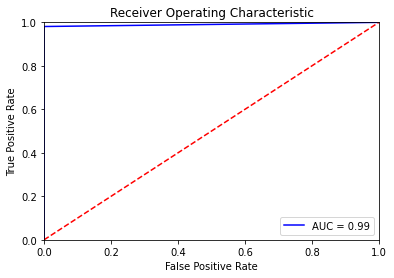

In [73]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresh = roc_curve(y_v,model_best3.predict(Xv_m))
plt.title('Receiver Operating Characteristic')
auc = roc_auc_score(y_v,model_best3.predict(Xv_m))
plt.plot(fpr, tpr, 'b', label = f'AUC = {auc.round(2)}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Negrete Colin Juan Pablo